In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./BHP.csv')
df.head()

,area_type,availability,address,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,"1 Annasandrapalya,Bangalore",11 Bedroom,NaN,1200.0,6.0,3.0,150.0
1,Super built-up Area,Ready To Move,"1 Giri Nagar,Bangalore",11 BHK,Bancyri,5000.0,9.0,3.0,360.0
2,Super built-up Area,Ready To Move,"1 Immadihalli,Bangalore",11 BHK,NaN,6000.0,12.0,NaN,150.0
3,Plot Area,Ready To Move,"1 Ramamurthy Nagar,Bangalore",11 Bedroom,NaN,1200.0,11.0,0.0,170.0
4,Super built-up Area,Ready To Move,12th cross srinivas nagar banshankari 3rd stag...,1 BHK,NaN,1800.0,1.0,1.0,200.0


In [43]:
df.columns

Index(['area_type', 'availability', 'address', 'size', 'society', 'total_sqft',
       'bath', 'balcony', 'price'],
      dtype='object')

In [63]:
from geopy.geocoders import ArcGIS
nom=ArcGIS()

In [68]:
#nom.geocode('1 Annasandrapalya,Bangalore').latitude
nom.geocode('1 Annasandrapalya,Bangalore')

Location(Annasandrapalya, Hal, Bangalore, Bengaluru, Karnataka, (12.964330000000075, 77.66712000000007, 0.0))

In [71]:
df['Latitude'] = df['address'].apply(lambda x: nom.geocode(x).latitude if nom.geocode(x) else None)

GeocoderUnavailable: HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/findAddressCandidates?singleLine=2nd+Stage+Nagarbhavi%2CBangalore&f=json&maxLocations=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=1)"))

In [55]:
def geocode_address(address):
    location = nom.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [57]:
geocode_address('1 Annasandrapalya,Bangalore')

(12.964330000000075, 77.66712000000007)

In [61]:

df['lat'], df['lon'] = zip(*df['address'].map(geocode_address))

NameError: name 'geopy' is not defined

Location(Annasandrapalya, Hal, Bangalore, Bengaluru, Karnataka, (12.964330000000075, 77.66712000000007, 0.0))

In [45]:
#df[['Latitude', 'Longitude']] = df['address'].apply(lambda x: pd.Series(geocode_address(x)))


In [46]:
geocode_address('1 Annasandrapalya,Bangalore')

(None, None)

In [30]:
df.tail()

,area_type,availability,address,size,society,total_sqft,bath,balcony,price,lon,lat
13269,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675.0,3.0,NaN,92.13,None,None
13270,Super built-up Area,Ready To Move,Yeshwanthpur Industrial Suburb,3 BHK,NaN,2100.0,3.0,2.0,240.00,None,None
13271,Super built-up Area,Ready To Move,Yeshwanthpur Industrial Suburb,2 BHK,Essic C,1415.0,2.0,2.0,120.00,None,None
13272,Super built-up Area,Ready To Move,Yeshwanthpur Industrial Suburb,6 BHK,Essic C,3800.0,6.0,NaN,390.00,None,None
13273,Super built-up Area,Ready To Move,Zuzuvadi,3 BHK,NaN,1200.0,3.0,3.0,75.00,None,None


In [7]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-12-2023,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-06-2023,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [40]:
df.shape

(13320, 9)

In [41]:
df.describe()

,total_sqft,bath,balcony,price
count,13274.000000,13201.000000,12669.000000,13274.000000
mean,1559.626683,2.691160,1.585682,112.453680
std,1238.405218,1.338867,0.816734,149.070357
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1276.000000,2.000000,2.000000,72.000000
75%,1680.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13274 non-null  object 
 1   availability  13274 non-null  object 
 2   location      13273 non-null  object 
 3   size          13258 non-null  object 
 4   society       7802 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13201 non-null  float64
 7   balcony       12669 non-null  float64
 8   price         13274 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [43]:
pd.isnull(df).sum()

area_type         46
availability      46
location          47
size              62
society         5518
total_sqft        46
bath             119
balcony          651
price             46
dtype: int64

In [44]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area', nan], dtype=object)

In [45]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [46]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', nan, '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [47]:
df.groupby('area_type')['price'].mean()

area_type
Built-up  Area          104.013739
Carpet  Area             90.333953
Plot  Area              208.831530
Super built-up  Area     92.946298
Name: price, dtype: float64

In [48]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [49]:
df['total_sqft']=df['total_sqft'].astype('float')

In [50]:
df['price_per_sqft']=df['price']/df['total_sqft']
df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)

location
Grihalakshmi Layout                      6.250000
Srirampuram                              4.810041
Suragajakkanahalli                       3.393636
Weavers Colony                           0.688013
Raghuvanahalli                           0.386479
                                           ...   
Sadhguru Layout                          0.021493
Yelahanka,MVIT college                   0.014955
Indranagar  100ft road defence colony    0.013793
SARJAPUR BAGALUR ROAD                    0.007299
4 Bedroom Farm House in Bagalur          0.007299
Name: price_per_sqft, Length: 1299, dtype: float64

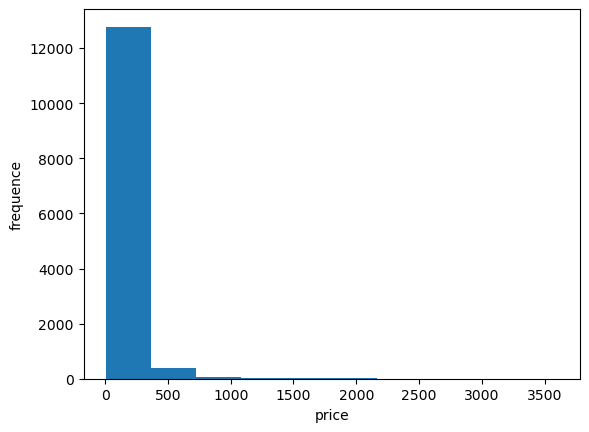

In [55]:
plt.hist(df['price'])
plt.xlabel("price")
plt.ylabel('frequence')
plt.show()

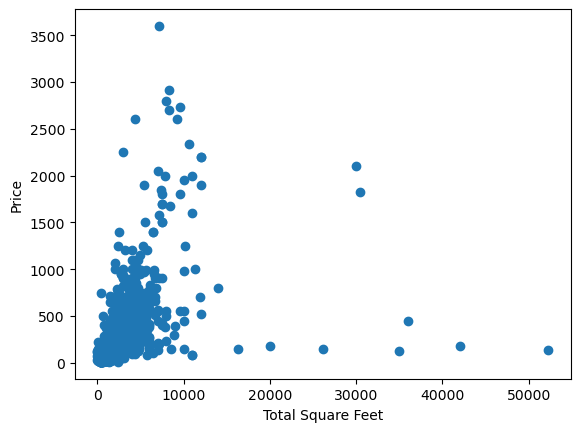

In [56]:
#Plot a scatter plot of "total_sqft" vs "price":
plt.scatter(df['total_sqft'],df['price'])
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.show()

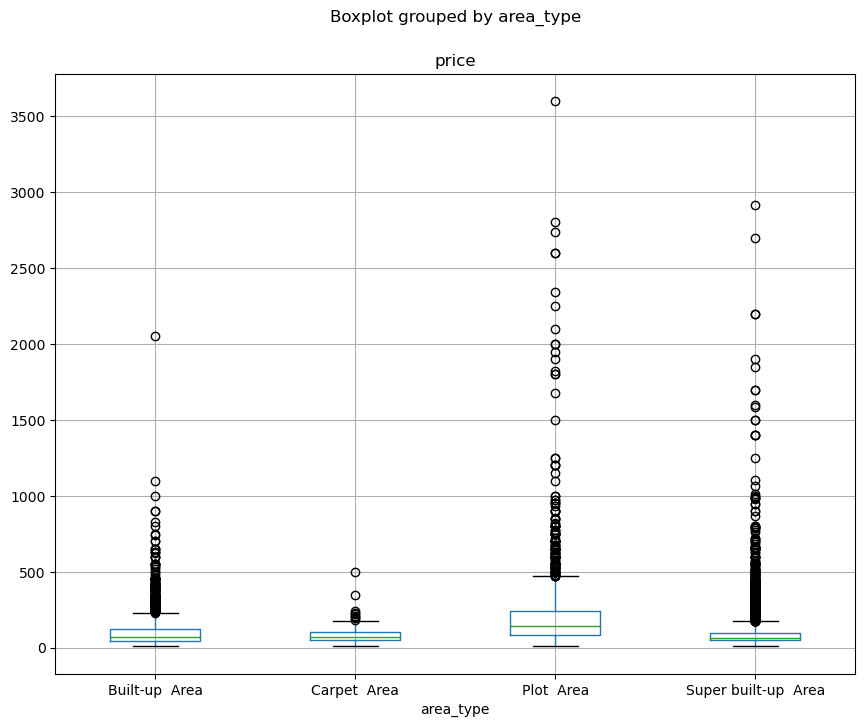

In [58]:
#Plot a boxplot of "price" by "area_type":
df.boxplot(column="price", by="area_type", figsize=(10, 8))
plt.show()

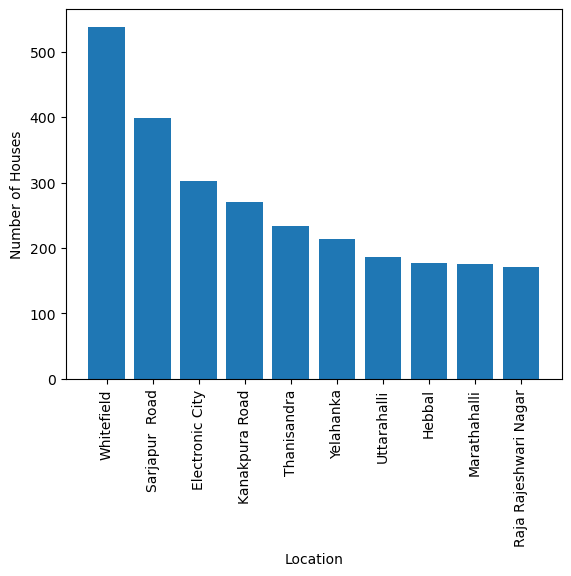

In [60]:
#Plot a bar chart of the top 10 locations by number of houses:
top_locations = df["location"].value_counts().sort_values(ascending=False)[:10]
plt.bar(top_locations.index, top_locations)
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Number of Houses")
plt.show()

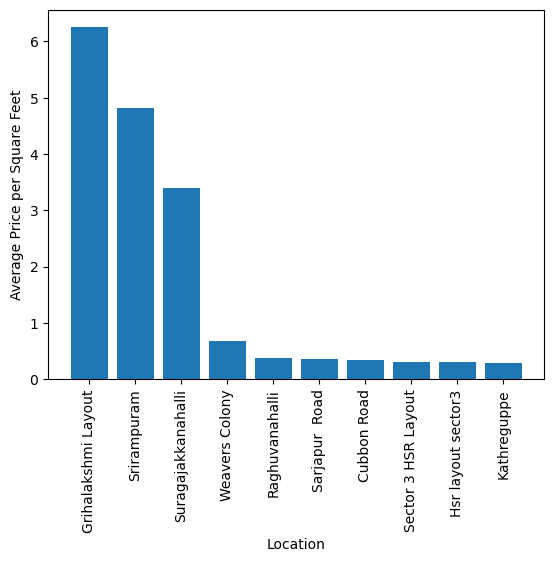

In [62]:
#Plot a bar chart of the top 10 locations by average price per square feet:
price_per_sqft = df.groupby("location")["price_per_sqft"].mean().sort_values(ascending=False)[:10]
plt.bar(price_per_sqft.index, price_per_sqft)
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.ylabel("Average Price per Square Feet")
plt.show()

In [11]:
df

,area_type,availability,address,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,"1 Annasandrapalya,Bangalore",11 Bedroom,NaN,1200.0,6.0,3.0,150.00
1,Super built-up Area,Ready To Move,"1 Giri Nagar,Bangalore",11 BHK,Bancyri,5000.0,9.0,3.0,360.00
2,Super built-up Area,Ready To Move,"1 Immadihalli,Bangalore",11 BHK,NaN,6000.0,12.0,NaN,150.00
3,Plot Area,Ready To Move,"1 Ramamurthy Nagar,Bangalore",11 Bedroom,NaN,1200.0,11.0,0.0,170.00
4,Super built-up Area,Ready To Move,12th cross srinivas nagar banshankari 3rd stag...,1 BHK,NaN,1800.0,1.0,1.0,200.00
...,...,...,...,...,...,...,...,...,...
13268,Super built-up Area,Ready To Move,"Yeshwanthpur,Bangalore",3 BHK,IBityin,1675.0,3.0,NaN,92.13
13269,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",3 BHK,NaN,2100.0,3.0,2.0,240.00
13270,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",2 BHK,Essic C,1415.0,2.0,2.0,120.00
13271,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",6 BHK,Essic C,3800.0,6.0,NaN,390.00


In [13]:
df.price.min()

8.0

In [12]:
a=df.price.quantile(0.001)
a

11.5

In [9]:
b=df.price.quantile(0.999)
b

2000.0

In [14]:
new_df=df[(df['price']>a)&(df['price']<b)]
new_df

,area_type,availability,address,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,"1 Annasandrapalya,Bangalore",11 Bedroom,NaN,1200.0,6.0,3.0,150.00
1,Super built-up Area,Ready To Move,"1 Giri Nagar,Bangalore",11 BHK,Bancyri,5000.0,9.0,3.0,360.00
2,Super built-up Area,Ready To Move,"1 Immadihalli,Bangalore",11 BHK,NaN,6000.0,12.0,NaN,150.00
3,Plot Area,Ready To Move,"1 Ramamurthy Nagar,Bangalore",11 Bedroom,NaN,1200.0,11.0,0.0,170.00
4,Super built-up Area,Ready To Move,12th cross srinivas nagar banshankari 3rd stag...,1 BHK,NaN,1800.0,1.0,1.0,200.00
...,...,...,...,...,...,...,...,...,...
13268,Super built-up Area,Ready To Move,"Yeshwanthpur,Bangalore",3 BHK,IBityin,1675.0,3.0,NaN,92.13
13269,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",3 BHK,NaN,2100.0,3.0,2.0,240.00
13270,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",2 BHK,Essic C,1415.0,2.0,2.0,120.00
13271,Super built-up Area,Ready To Move,"Yeshwanthpur Industrial Suburb,Bangalore",6 BHK,Essic C,3800.0,6.0,NaN,390.00


In [15]:
df.columns

Index(['area_type', 'availability', 'address', 'size', 'society', 'total_sqft',
       'bath', 'balcony', 'price'],
      dtype='object')